# 线性回归和随机梯度下降两种算法对比
评价指标：MAE, MSE, R-square
数据集：波士顿房价数据

In [39]:
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
# %load linear_regreesion.py
#从sklearn.datasets导入波士顿房价数据读取器
#读取房价数据到存储变量boston中
from sklearn.datasets import load_boston
boston = load_boston()
X=pd.DataFrame(boston.data)
y=pd.DataFrame(boston.target)
X.columns = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
y.columns = ['price']


In [41]:
X.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
# 为了方便，我把数据转为dataframe，并加上了列名
# - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's

In [43]:
#随机采样25%的数据构建测试样本，其余作为训练样本
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33,test_size=0.25)

In [44]:
#分析回归目标值的差异
print('the max target value is',np.max(boston.target))

the max target value is 50.0


In [45]:
print('the min target value is',np.min(boston.target))

the min target value is 5.0


In [46]:
print('the average target value is',np.mean(boston.target))

the average target value is 22.5328063241


In [47]:
# 训练与测试标准化处理
from sklearn.preprocessing import StandardScaler

In [48]:
#分别初始化对特征和目标值的标准器
ss_X = StandardScaler()
ss_y = StandardScaler()

In [49]:
#分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

In [50]:
# 使用线性回归模型LinearRegression和SGDRegressor对美国波士顿地区房价进行预测
#从sklearn.linear_model导入LinearRegression
from sklearn.linear_model import LinearRegression

In [51]:
#使用默认的配置初始化线性回归器LinearRegression
lr = LinearRegression()

In [52]:
#使用训练数据进行参数估计
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
#对测试数据进行回归预测
lr_y_predict = lr.predict(X_test)

In [54]:
#从sklearn.linear_model导入SGDRegresion
from sklearn.linear_model import SGDRegressor

In [55]:
#使用默认配置初始化线性回归SGDRegressor
sgdr = SGDRegressor()

In [56]:
#使用训练数据进行参数估计
sgdr.fit(X_train,y_train.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [57]:
#对测试数据进行回归预测
sgdr_y_predict = sgdr.predict(X_test)

In [58]:
# '''
# LinearRegression使用三种回归评价机制以及两种调用R-square评价模块的方法，对本节模型的回归性能做出评价
# '''
#使用LinearRegression模型自带的评估模块，并输出评估结果
print('the value of default measurement of LinearRegression is',lr.score(X_test,y_test))

the value of default measurement of LinearRegression is 0.6763403831


In [59]:
#使用sklearn.metrics依次导入r2_score,mean_squared_error以及mean_absolute_error用于回归性能评估
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [60]:
#使用r2_score模块，并输出评估结果
print('the value of R-squared of LinearRegression is',r2_score(y_test,lr_y_predict))

the value of R-squared of LinearRegression is 0.6763403831


In [61]:
#使用mean_squared_error模块，并输出评估结果
print('the mean squared error of LinearRegression is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_y_predict)))

the mean squared error of LinearRegression is 25.0969856921


In [62]:
#使用mean_absolute_error模块，并输出评估结果
print('the mean absolute error of LinearRegression is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_y_predict)))

the mean absolute error of LinearRegression is 3.5261239964


In [63]:
# '''
# SGDRegressor使用三种回归评价机制以及两种调用R-square评价模块的方法，对本节模型的回归性能做出评价
# '''
#使用SGDRegressor模型自带的评估模块，并输出评估结果
print('the value of default measurement of SGDRegressor is',sgdr.score(X_test,y_test))

the value of default measurement of SGDRegressor is 0.650414182762


In [64]:
#使用sklearn.metrics依次导入r2_score,mean_squared_error以及mean_absolute_error用于回归性能评估
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [65]:
#使用r2_score模块，并输出评估结果
print('the value of R-squared of SGDRegressor is',r2_score(y_test,sgdr_y_predict))

the value of R-squared of SGDRegressor is 0.650414182762


In [66]:
#使用mean_squared_error模块，并输出评估结果
print('the mean squared error of SGDRegressor is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(sgdr_y_predict)))

the mean squared error of SGDRegressor is 27.1073368294


In [67]:
#使用mean_absolute_error模块，并输出评估结果
print('the mean absolute error of SGDRegressor is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(sgdr_y_predict)))

the mean absolute error of SGDRegressor is 3.52332054792


In [68]:
y_pred=ss_y.inverse_transform(lr_y_predict) #使用线性回归，并还原数据
y_test1=ss_y.inverse_transform(y_test)
t = np.arange(len(y_pred))

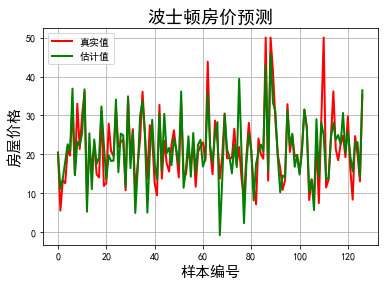

In [69]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test1, 'r-', lw=2, label=u'真实值')
plt.plot(t, y_pred, 'g-', lw=2, label=u'估计值')
plt.legend(loc='best')
plt.title(u'波士顿房价预测', fontsize=18)
plt.xlabel(u'样本编号', fontsize=15)
plt.ylabel(u'房屋价格', fontsize=15)
plt.grid()
plt.show())#线性回归的比较图

In [70]:
y_pred2=ss_y.inverse_transform(lr_y_predict) #使用SGD回归，并还原数据
y_test1=ss_y.inverse_transform(y_test)
t = np.arange(len(y_pred))

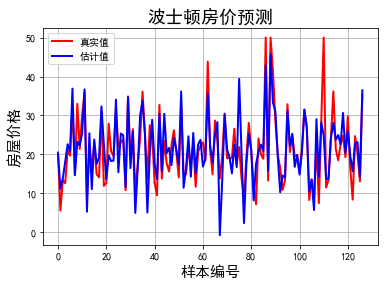

In [71]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test1, 'r-', lw=2, label=u'真实值')
plt.plot(t, y_pred2, 'b-', lw=2, label=u'估计值')
plt.legend(loc='best')
plt.title(u'波士顿房价预测', fontsize=18)
plt.xlabel(u'样本编号', fontsize=15)
plt.ylabel(u'房屋价格', fontsize=15)
plt.grid()
plt.show()#SGD回归的比较图